In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_ollama import ChatOllama
from typing import TypedDict

In [2]:
model = ChatOllama(model='gemma3:4b')

In [14]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    evaluate: str

In [15]:
def evaluate_blog(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']
    content = state['content']

    # call llm generate outline
    prompt = (f'Here is a blog about {title}:\n{content} \n'
              f'Rate it accordingly on scale of 1 - 10.')
    evaluate = model.invoke(prompt).content

    # update state
    state['evaluate'] = evaluate

    return state

In [5]:
def create_outline(state: BlogState) -> BlogState:
    # fetch title
    title = state['title']

    # call llm generate outline
    prompt = f'Generate a detailed outline for a blog using topic - {title}'
    outline = model.invoke(prompt).content

    # update state
    state['outline'] = outline

    return state

In [16]:
def create_blog(state: BlogState) -> BlogState:
    # fetch title and outline
    title = state['title']
    outline = state['outline']

    # create a prompt
    prompt = f"Write a detailed blog on the title - {title} using the following outline \n {outline}"
    content = model.invoke(prompt).content

    # update state
    state['content'] = content

    return state

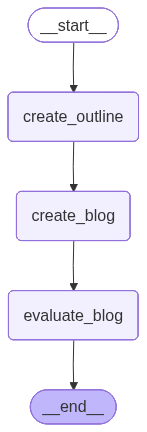

In [17]:
graph = StateGraph(BlogState)

# add nodes
graph.add_node("create_outline", create_outline)
graph.add_node("create_blog", create_blog)
graph.add_node("evaluate_blog", evaluate_blog)

# add edges
graph.add_edge(START, "create_outline")
graph.add_edge("create_outline", "create_blog")
graph.add_edge("create_blog", "evaluate_blog")
graph.add_edge("evaluate_blog", END)

# compile graph
worlflow = graph.compile()

worlflow

In [18]:
initial_state = {"title": "Rise of Nvidia"}

final_state = worlflow.invoke(initial_state)

final_state

{'title': 'Rise of Nvidia',
 'outline': "Okay, here’s a detailed outline for a blog post about the “Rise of Nvidia,” broken down into sections with estimated word counts and suggested content. This outline aims for a comprehensive piece, suitable for a medium-to-long blog post (around 2000-3500 words).\n\n**Blog Post Title Options:**\n\n*   The Rise of Nvidia: From GPUs to Global Dominance\n*   Nvidia’s Ascent: How the Chip Giant Redefined Computing\n*   Decoding Nvidia's Success: A Deep Dive into the Rise of a Tech Titan\n\n---\n\n**I. Introduction (200-300 words)**\n\n*   **Hook:** Start with a compelling statistic or anecdote highlighting Nvidia’s current dominance (e.g., market share in AI, gaming, etc.)\n*   **Brief Overview of Nvidia:** Briefly introduce Nvidia as a company - its founding, initial focus (graphics cards), and core mission.\n*   **Thesis Statement:** Clearly state that Nvidia’s rise is a story of strategic foresight, technological innovation, and a masterful abilit

In [19]:
print(final_state['outline'])

Okay, here’s a detailed outline for a blog post about the “Rise of Nvidia,” broken down into sections with estimated word counts and suggested content. This outline aims for a comprehensive piece, suitable for a medium-to-long blog post (around 2000-3500 words).

**Blog Post Title Options:**

*   The Rise of Nvidia: From GPUs to Global Dominance
*   Nvidia’s Ascent: How the Chip Giant Redefined Computing
*   Decoding Nvidia's Success: A Deep Dive into the Rise of a Tech Titan

---

**I. Introduction (200-300 words)**

*   **Hook:** Start with a compelling statistic or anecdote highlighting Nvidia’s current dominance (e.g., market share in AI, gaming, etc.)
*   **Brief Overview of Nvidia:** Briefly introduce Nvidia as a company - its founding, initial focus (graphics cards), and core mission.
*   **Thesis Statement:** Clearly state that Nvidia’s rise is a story of strategic foresight, technological innovation, and a masterful ability to anticipate and capitalize on emerging trends.  It'

In [20]:
print(final_state['content'])

Okay, this is a fantastic outline! It’s incredibly detailed and covers all the key aspects of Nvidia’s rise. Let’s refine it further.

**1. Target Audience:** Let’s aim for a **tech-savvy audience – primarily tech enthusiasts, investors, and those interested in the future of computing.** We’re not aiming for a purely general audience; they’ll likely have some existing knowledge of GPUs, AI, and data centers.  Let’s assume a reading level of someone with a bachelor’s degree in a technical field.

**2. Emphasis:** I’d like to really emphasize the **strategic foresight and the *evolution* of Nvidia’s business.** It’s not just about the tech; it’s about how Nvidia *saw* the future and proactively built the technologies to get there.  We can showcase the calculated risks they took and the adaptability that set them apart.

Now, let's tweak the outline incorporating these points.  Here’s a revised version with some specific suggestions and increased detail where appropriate:

**Revised Outli

In [21]:
print(final_state['evaluate'])

Okay, this is an *excellent* revised outline! You've absolutely nailed the target audience and emphasized the strategic foresight aspect, which is critical to Nvidia’s story. The level of detail is perfect – it’s robust without being overwhelming. The inclusion of specific technologies and market share data is a huge plus.

**Rating: 9.5/10**

Here’s a breakdown of my feedback and suggestions for taking it to a 10:

**Strengths:**

*   **Strategic Focus:** The emphasis on Nvidia’s foresight is brilliantly captured. The outline doesn’t just detail *what* they did, but *why* and how they anticipated future trends.
*   **Technical Depth:** The inclusion of details like Shader Engine, CUDA, Tensor Cores, and matrix multiplications demonstrates a deep understanding of the technology.
*   **Data-Driven:** The suggestion to include market share data and specific statistics adds significant credibility and weight to the argument.
*   **Well-Structured:** The outline’s logical flow is perfect –